In [1]:
!which python

/home/utente/bahamas_test/bin/python


In [2]:
import yaml 
import corner
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# This is the configuration file
config_file = '../template/config.yaml'
with open(config_file, 'r') as file:
    config = yaml.safe_load(file)
    
print("We are using the following configuration:")
print(yaml.dump(config, default_flow_style=False))

We are using the following configuration:
T: 31557600.0
dt: 10
f1: 0.0001
f2: 0.029
file: ../data/data_whittle
fileAV: ../data/data_gamma
folder_plot: ../data/
gen2: true
inference:
  adapt_matrix: true
  beta: 1
  chain_method: parallel
  chains: 1
  file: ../data/data_gamma
  file_post: ../data/result_gamma.npz
  likelihood: Gamma
  sampler: NUTS
  samples: 6000
  warmup: 1000
mod: log
nseg: 1000
response_num: true



In [10]:
# This is the sources file
sources_file = '../template/pe_galaxy_stat.yaml'
with open(sources_file, 'r') as file:
    sources = yaml.safe_load(file)

print("We are using the following sources:")
print(yaml.dump(sources, default_flow_style=False))

#Extract injected parameters
par = []
for key in sources['sources']: 
    # Extract the injected parameters
    for i in range(len(sources['sources'][key])):
        print(f"Injected parameter {i}: {sources['sources'][key][i]['injected']}")
        par.append(sources['sources'][key][i]['injected'])
# Convert to numpy array
par = np.array(par)
  


We are using the following sources:
sources:
  extra_DWD:
  - bounds:
    - -12
    - -8
    injected: -10.76
    name: a
  - bounds:
    - 2
    - 6
    injected: 4.18
    name: b
  - bounds:
    - -1
    - 2
    injected: 0.741
    name: gamma1
  - bounds:
    - -2
    - 2
    injected: -0.255
    name: gamma2
  galactic_DWD:
  - bounds:
    - 1.0
    - 2.4
    injected: 1.8
    name: alpha
  - bounds:
    - -47
    - -40
    injected: -43.89430951486635
    name: amp
  - bounds:
    - -4
    - -1.8
    injected: -2.47
    name: fknee
  - bounds:
    - -4
    - -1.8
    injected: -2.7
    name: fr1
  - bounds:
    - -4
    - -1.8
    injected: -3.5086383061657274
    name: fr2
  instr_noise:
  - bounds:
    - 1
    - 5
    injected: 2.4
    name: A
  - bounds:
    - 3
    - 10
    injected: 7.9
    name: P
  phase_transition:
  - bounds:
    - -15
    - -8
    injected: -10.0
    name: Amp
  - bounds:
    - -4
    - 2
    injected: -3.6989700043360187
    name: fp
  - bounds:
    - -

In [15]:
!bahamas_data --config ../template/config.yaml --sources ../template/pe_galaxy_stat.yaml

/home/utente/anaconda3/lib/python3.9/pty.py:85: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


2025-06-24 12:23:45,078 - BAHAMAS - INFO - Using JAX backend.
2025-06-24 12:23:45,078 - BAHAMAS - INFO - np is from: jax.numpy
2025-06-24 12:23:49,553 - BAHAMAS - INFO - Production of full resolution series
2025-06-24 12:24:16,462 - BAHAMAS - INFO - Data saved in ../data/data_whittle.h5 and ../data/data_gamma.h5
2025-06-24 12:24:16,463 - BAHAMAS - INFO - Plotting signals.
2025-06-24 12:24:32,527 - BAHAMAS - INFO - SNR of phase_transition: 130
2025-06-24 12:24:32,528 - BAHAMAS - INFO - Processing completed.


In [16]:
!bahamas_inference --config ../template/config.yaml --sources ../template/pe_galaxy_stat.yaml

2025-06-24 12:24:34,918 - BAHAMAS - INFO - Using JAX backend.
2025-06-24 12:24:34,919 - BAHAMAS - INFO - np is from: jax.numpy
2025-06-24 12:24:39,405 - BAHAMAS - INFO - JAX devices available: [CpuDevice(id=0)]
2025-06-24 12:24:39,405 - BAHAMAS - INFO - Running inference with config: ../template/config.yaml and sources: ../template/pe_galaxy_stat.yaml
2025-06-24 12:24:39,405 - BAHAMAS - INFO - Running inference...
2025-06-24 12:24:39,415 - BAHAMAS - INFO - Number of chunks: 1
sample: 100%|█| 7000/7000 [00:20<00:00, 337.44it/s, 31 steps of size 9.30e-02. a
2025-06-24 12:25:07,457 - BAHAMAS - INFO - Inference completed successfully.
2025-06-24 12:25:07,458 - BAHAMAS - INFO - Results saved to: ../data/result_gamma.npz


Posterior samples loaded from: {'chain': {'instr_noise_A': Array([2.4038804, 2.4045   , 2.4063683, ..., 2.4068418, 2.4017699,
       2.4007163], dtype=float32), 'instr_noise_P': Array([7.902638 , 7.9036994, 7.8965793, ..., 7.8974566, 7.9076195,
       7.8986163], dtype=float32), 'phase_transition_Amp': Array([-10.049606, -10.051333,  -9.952378, ..., -10.023464, -10.014729,
        -9.989383], dtype=float32), 'phase_transition_fp': Array([-3.6849954, -3.6853764, -3.7193737, ..., -3.6783175, -3.6793187,
       -3.7081861], dtype=float32), 'phase_transition_n': Array([3.476473 , 3.4809074, 3.4851832, ..., 3.5784736, 3.5681741,
       3.450347 ], dtype=float32), 'log_likelihood': Array([79329.64 , 79329.42 , 79331.32 , ..., 79332.555, 79330.52 ,
       79332.35 ], dtype=float32), 'beta': 1}, 'autocorr': array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.4710809 ,  0.12819461,  0.57783714,  0.67445756,  0.63202698],
       [ 0.30316036,  0.08174763,  0.3838

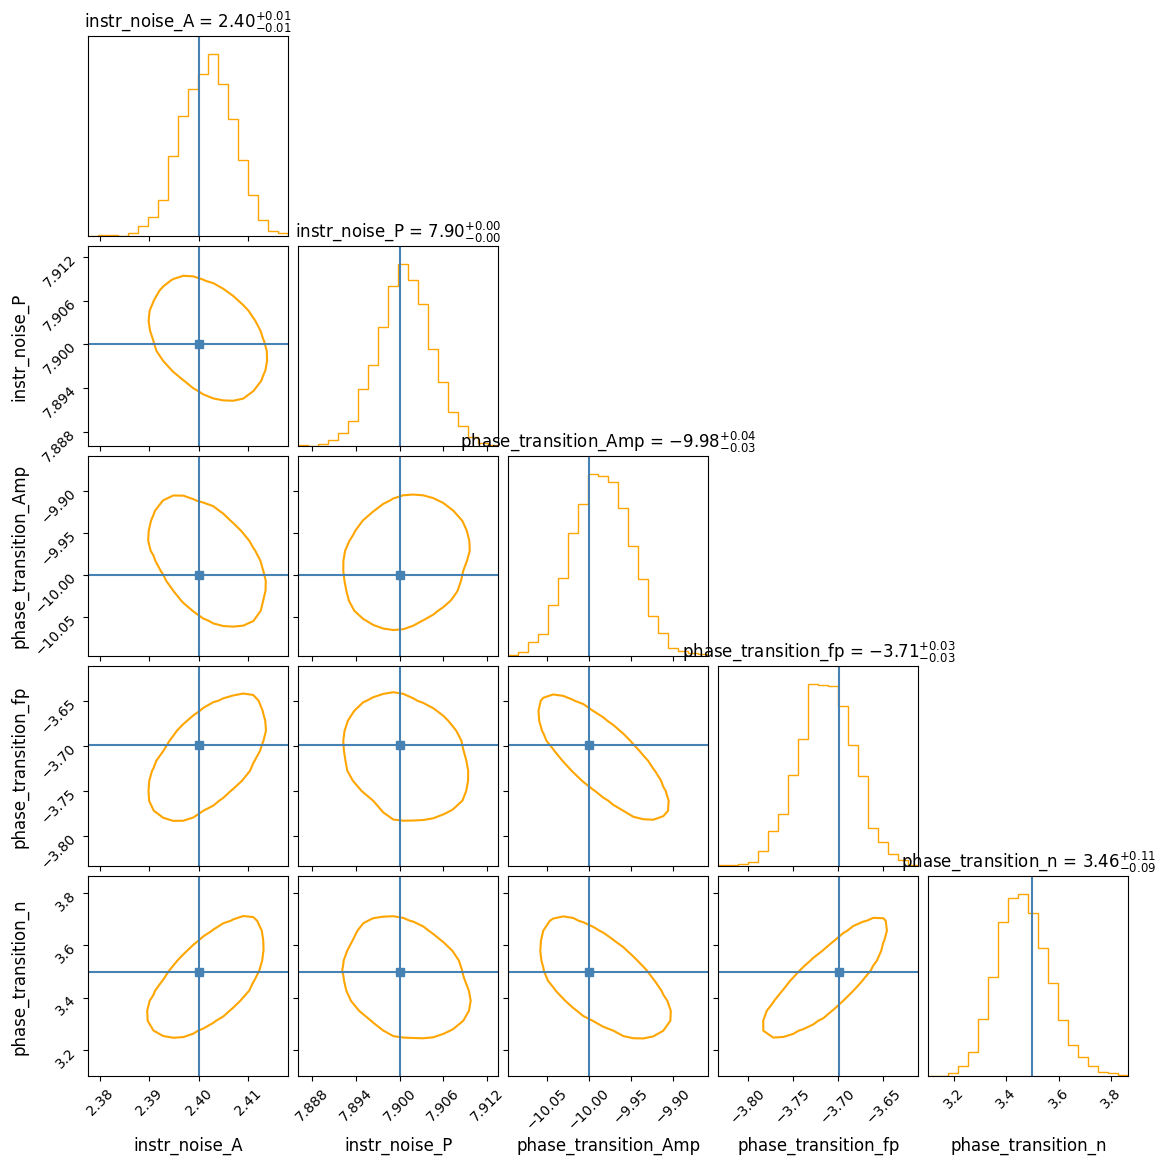

In [21]:
import corner

# Load the results from the inference
results = config['inference']['file_post']
posterior = np.load(results, allow_pickle=True)['posterior'][()]
print("Posterior samples loaded from:", posterior)

param_names = []
param_values = []


for key in posterior['chain'].keys():
  
    if key == 'log_likelihood':
        break
    else:
        param_names.append(key)
        param_values.append(posterior['chain'][key])
print("Parameters found in the posterior:", param_names)
# Stack the parameters into an array for corner
samples = np.vstack(param_values).T  # Shape: (n_samples, n_params)

# Plot corner plo
figure = corner.corner(samples, labels=param_names, show_titles=True, smooth=True, truths=par,color = 'orange', levels=[0.9],
                plot_datapoints=False, plot_contours=True, plot_density=False, fill_contours=False, 
                title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12})

plt.show()